**Before you turn this problem in, make sure your notebook is in tidy format and everything runs as expected:**

1. When the problem needs you to write codes inside a function, just directly write codes inside the already-existing functions. Don't create new functions and write your code in the new functions. 

2. Don't modify the original TEST cells! You can insert new testing cells to test your code when doing your homework. But make sure to delete those **new testing cells** after you finish your problem.

3. After you complete all problems, to insure there is no error in your notebook, do the following: first, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and second **run all cells** (in the menubar, select Cell$\rightarrow$Run All). **Note that this step is very important and can help you catch the error!**

**Make sure you delete `raise NotImplementedError()`** (if existing) inside the function before you write your code and fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE":

In [1]:
# fill in your name
NAME = "Dylan Elliott"

---

# Shapes on maps

You should import the packages that you need to run your code. For **each problem**, you need to **put all your codes in one single cell**. Add as many comments as you could.

### 1. Compare area of Greenland in different projections

Different projections preserve or distort different attributes – such as area – of the surface of Earth. Greenland is large, but it's hard to tell how large because of this distortion that often occurs in projections. 

1. Use geopandas to read in the `ne_50m_admin_0_countries` shapefile (NOTE: This file is the one in your `hw11` folder, NOT the one in your in-class material folder). Hint: can use gpd.read_file("ne_50m_admin_0_countries") directly.

2. Find the actual area of Greenland using an appropriate projection (we learned in the `maps.ipynb`, or you can find them [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html)) and check it with the actual number.
3. When Greenland is in a projection that does not preserve area, the area will be different from reality. Compare the area of Greenland that you found with the area in two other projections: Robinson and Mercator. **Note that you need to write down your comparison explicitly in your short summary**.

Your final products should be 
* a figure with subplots of each of the three projections showing the full world with Greenland plotted distinctly for comparison;
* **a short summary of the area in each projection that includes a comparison of the areas (e.g., the difference between different projection methods, which one is good, which one is bad, etc)**.

---

Grading rubric [14 points]:

* [2 pts] Set up all 3 projections (the equal-area projection on the first subplot, the Robinson projection on the second subplot, and the Mercator projection on the third subplot)
* [3 pts] Plots of projections are reasonable, with Greenland distinct with its own color different from other pologyons
* [7 pts] Area of Greenland is given in the title of the three subplots, one of which is the actual area of Greenland.
* [2 pts] Compare the area of Greenland in each projection

Below is what I made for your reference.

<img src="area_compare.png" width=800 />

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gpd # geo-vector data analysis
from shapely.geometry import Point, LineString # basic vector data
%matplotlib inline
# limit the number of rows
pd.set_option('display.max_rows', 6)
######################################################

gdf = gpd.read_file("ne_50m_admin_0_countries")

countries = gdf['ADMIN']

greenland = gdf.loc[gdf['ADMIN'] == "Greenland", ]
# greenland[['geometry']]
# type(greenland['geometry'])
greenland_shape = gdf['geometry'].iloc[181]
# greenland_shape

# create a projection (equal area)
ea = ccrs.LambertAzimuthalEqualArea() # equal area
gdf_lambert = gdf.to_crs(ea.proj4_init)
greenland_area_equal_area = gdf_lambert.area.iloc[181]
# print("{:.2e}".format(greenland_area_equal_area))

rob = ccrs.Robinson() # create a projection and get area in robinson projection
gdf_rob = gdf.to_crs(rob.proj4_init)
greenland_area_robinson = gdf_rob.area.iloc[181]
# print("{:.2e}".format(greenland_area_robinson)) #"{:.2e}".format(18920000) sci notation

mer = ccrs.Mercator()
gdf_mer = gdf.to_crs(mer.proj4_init)
greenland_area_mercator = gdf_mer.area.iloc[181]
# print("{:.2e}".format(greenland_area_mercator))

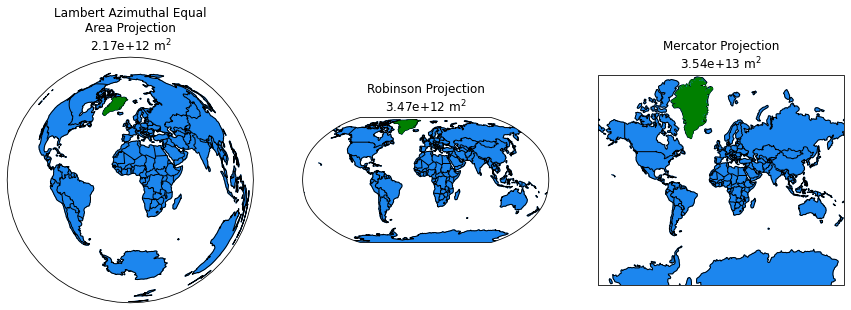

In [3]:
'''an appropriate projection -- LambertAzimuthalEqualArea'''
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(131,projection=ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=0, globe=None))
ax.coastlines(resolution='110m')
ax.add_geometries(greenland_shape, crs = ccrs.PlateCarree(), facecolor="g")
ax.add_feature(cfeature.LAND, facecolor='#1C86EE')
ax.set_title('Lambert Azimuthal Equal\nArea Projection\n'+"{:.2e}".format(greenland_area_equal_area)+ ' m$^2$')
ax.add_feature(cfeature.BORDERS)


ax2 = fig.add_subplot(132,projection=ccrs.Robinson())
ax2.coastlines(resolution='110m')
ax2.add_geometries(greenland_shape, crs = ccrs.PlateCarree(), facecolor="g")
ax2.add_feature(cfeature.LAND, facecolor='#1C86EE')
ax2.set_title('Robinson Projection\n'+"{:.2e}".format(greenland_area_robinson)+ ' m$^2$')
ax2.add_feature(cfeature.BORDERS)

ax3 = fig.add_subplot(133,projection=ccrs.Mercator())
ax3.coastlines(resolution='110m')
ax3.add_geometries(greenland_shape, crs = ccrs.PlateCarree(), facecolor="g")
ax3.add_feature(cfeature.LAND, facecolor='#1C86EE')
ax3.set_title('Mercator Projection\n'+"{:.2e}".format(greenland_area_mercator)+ ' m$^2$')
ax3.add_feature(cfeature.BORDERS)

### 2. Flyover states (graduate student problem)


What states do you fly over and see when you fly from LA (airport code LAX) to NYC (airport code EWR)?

    LAX: 33.9425° N, 118.4081° W
    EWR: 40.6925° N, 74.1686° W

**Note: You will only need to create a single figure! Don't plot the elements below on separate figures!** <br>

Steps:
1. Set up a Mercator projection and create a map
1. Plot states (the `ne_110m_admin_1_states_provinces` shapefile) (NOTE: This file is the one in your `hw11` folder, NOT the one in your in-class material folder).
1. Plot the starting and ending locations
1. Plot the flight path (the `lons` and `lats` in the following cell) between the starting and ending locations
1. Create a buffer around the flight path representing area that might be visible to you from the plane (sight path). Assume that you could see 100km on either side of the plane. Be sure to first convert your flight path into projected coordinates (such as Mercator) before you do the buffer. Add the buffer to the plot. Hint: After creating the buffer in Mercator, you can then convert the buffer back to 4326 and do the intersection for the tasks below. 

1. Find intersections between the flight path and the state polygons and color these states differently in the plot.
1. Find intersections between the sight path and the state polygons and color these states differently in the plot.
1. Create and print out a list of the states that are flown over during the flight.

Be sure that your final map is clear, easy to read, and looks nice.

---

Grading rubric [19 points]:

* [2 pts] Set up projection successfully and create map
* [2 pts] Plot states and airport locations clearly. Set up the x and y extent to not show Alaksa and Hawaii
* [3 pts] Create flight path and add to plot
* [3 pts] Create buffer region and add to plot
* [6 pts] Find intersections between flight and sight paths with states, and plot each of them correctly
* [3 pts] Provide list of flown over states


Below is what I made for your reference.

<img src="flight_states.png" width=700 />

In [4]:
lons = [-118.4081, -116.53656281803954, -114.63494404602989, -112.70342143546311,
        -110.74234511851722, -108.75224911337924, -106.73386144433508, -104.6881124356053,
        -102.6161407277617, -100.51929657411526, -98.3991420049751, -96.25744750245255,
        -94.09618490844686, -91.91751639275596, -89.72377943401308, -87.51746790832203,
        -85.30120953200326, -83.07774005710772, -80.84987476165341, -78.62047790110475,
        -76.39243088444343, -74.1686]
lats = [33.9425, 34.62185468395183, 35.27195983702588, 35.89163680795418, 36.47971217805657,
        37.03502459436787, 37.5564322473648, 38.042820934293715, 38.493112624072936,
        38.9062744137114, 39.281327740305926, 39.61735768834621, 39.9135222108212,
        40.169061066104604, 40.38330426236194, 40.55567979862256, 40.68572049769913,
        40.773069741323866, 40.81748594212188, 40.818845619619054, 40.77714498701483, 40.6925]

Fly over states =

['Arizona', 'California', 'Colorado', 'Nevada', 'New Mexico', 'Utah', 'Iowa', 'Kansas', 'Missouri', 'Nebraska', 'Connecticut', 'Illinois', 'Indiana', 'Ohio', 'West Virginia', 'New Jersey', 'New York', 'Pennsylvania']


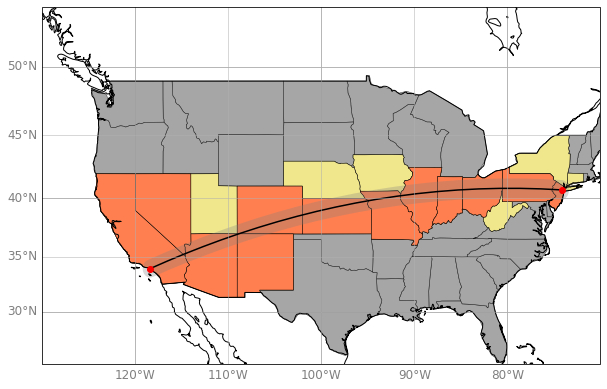

In [5]:
# x, y = ccrs.Mercator().transform_point(lons,lats,src_crs=ccrs.Mercator())
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import geopandas as gpd # geo-vector data analysis
from shapely.geometry import Point, LineString # basic vector data
%matplotlib inline
# limit the number of rows
pd.set_option('display.max_rows', 20)
######################################################
gdf_states = gpd.read_file("ne_110m_admin_1_states_provinces")
gdf_flight =  gpd.GeoDataFrame(geometry = [LineString(coordinates=zip(lons, lats))])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection = ccrs.Mercator())
ax.gridlines(zorder=0)
gdf_states.plot(ax=ax, transform = ccrs.PlateCarree(),color='grey',alpha=0.7,edgecolor='black',lw=.5)

gdf_flight.plot(ax=ax, transform = ccrs.PlateCarree(), color="black")
ax.coastlines(resolution='50m')
ax.set_extent([-130,-70,25,50])
ax.plot(lons[0],lats[0],transform=ccrs.PlateCarree(), marker='o', color='red',lw=5)
ax.plot(lons[-1],lats[-1],transform=ccrs.PlateCarree(), marker='o', color='red',lw=5)
ax.add_feature(cfeature.BORDERS)
# intersecting states
intersect_index = gdf_states.intersects(gdf_flight.geometry.iloc[0])
# use boolean index to filter the states
gdf_states_intersect = gdf_states.loc[intersect_index,]
#gdf_states_intersect.name
gl = ax.gridlines(draw_labels=True, 
                  linewidth=0.5,
                  x_inline=False, 
                  y_inline=False, 
                  xformatter=LONGITUDE_FORMATTER, 
                  yformatter=LATITUDE_FORMATTER)

gl.xlabel_style = {'size': 12, 'color': 'gray'}  # control how the tick labels look
gl.ylabel_style = {'size': 12, 'color': 'gray'}
gl.top_labels = False  # turn off labels where you don't want them
gl.right_labels = False

#buffer region of intersection
# 100 km roughly equals .9 degrees
gdf_buffer = gdf_flight.buffer(.8)
#shape
gdf_buffer.geometry.iloc[0]
# filter the states that intersect with the buffer region
intersect_buffer_index = gdf_states.intersects(gdf_buffer.geometry.iloc[0])
gdf_states_intersect_buffer = gdf_states.loc[intersect_buffer_index,]
gdf_states_intersect_buffer.plot(ax=ax, transform=ccrs.PlateCarree(),color='khaki',edgecolor='black',lw=.5)
gdf_states_intersect.plot(ax=ax, transform=ccrs.PlateCarree(),color='coral',edgecolor='black',lw=.5)
# add buffered flight
gdf_buffer.plot(ax=ax, transform = ccrs.PlateCarree(), facecolor="grey", alpha=0.3, linewidth=0.2)

flyoverstates = list(gdf_states_intersect_buffer.name)
print('Fly over states =\n')
print(flyoverstates)